<a href="https://colab.research.google.com/github/Badr2211/ML_coursat.ai/blob/main/An_introduction_to_machine_learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data

# Load data

Sample datasets:
    scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression.

In [ ]:

from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
boston = datasets.load_boston()

## Digits

### Simple Exploratory Data Analysis (EDA)

Any dataset contains:
    - data: [n_samples, n_features]
    - target: [n_samples,]

In [ ]:
print(digits.data)
print(digits.data.shape)#(n_samples, n_features)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


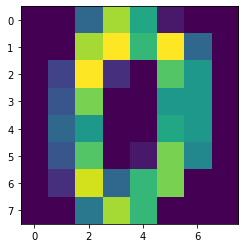

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.images[0])

### You could plot from data directly

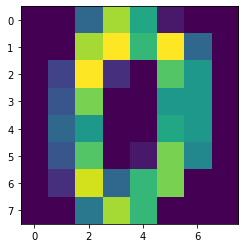

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.imshow(np.reshape(digits.data[0], [8, 8]))

In [ ]:
print(digits.target)
print(digits.target.shape)
print(digits.images.shape)


[0 1 2 ... 8 9 8]
(1797,)
(1797, 8, 8)


## Iris

### Simple Exploratory Data Analysis (EDA)

In [ ]:
dataset = iris
#print(dataset.data)
print(dataset.data.shape)#(n_samples, n_features)
#print(dataset.target)
print(dataset.target.shape)

(150, 4)
(150,)


## Boston

### Simple Exploratory Data Analysis (EDA)

In [ ]:
dataset = boston
#print(dataset.data)
print(dataset.data.shape)#(n_samples, n_features)
#print(dataset.target)
print(dataset.target.shape)

(506, 13)
(506,)


# Machine learning with sklearn

- Load and prepare data
- Model selection
- Model fitting
- Evaluation

# Simple Classification example

## Model = SVM

In sklearn, we have:
    - SVC --> SVM Classifier
    - SVR --> SVM Regressor
    

In [ ]:
from sklearn import svm
model = svm.SVC(gamma=0.001, C=100.)

Fit ao all data except the last example--> keep for test

In [ ]:
model.fit(digits.data[:-1], digits.target[:-1])


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.predict(digits.data[-1:])

array([8])

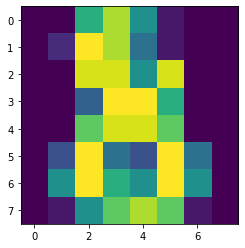

In [ ]:
plt.imshow(np.reshape(digits.data[-1:], [8, 8]))

# Model persistence (save/load)

## Using python only

Save using pickle

In [ ]:
import pickle
s = pickle.dumps(model)

Load using pickle

[8]


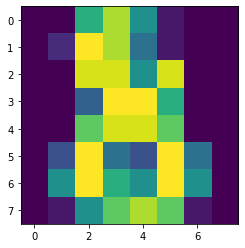

In [ ]:
model_loaded = pickle.loads(s)
print(model_loaded.predict(digits.data[-1:]))
plt.imshow(np.reshape(digits.data[-1:], [8, 8]))

Note that pickle has some security and maintainability issues. Please refer to section Model persistence (http://scikit-learn.org/stable/modules/model_persistence.html#model-persistence) for more detailed information about model persistence with scikit-learn.

## Using scikit learn

In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on big data, but can only pickle to the disk and not to a string

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, 'model_joblib.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_joblib.pkl']

[8]


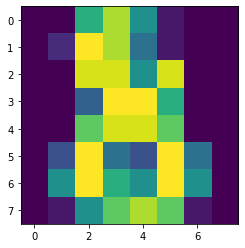

In [ ]:
model_loaded_joblib = joblib.load('model_joblib.pkl')
print(model_loaded_joblib.predict(digits.data[-1:]))
plt.imshow(np.reshape(digits.data[-1:], [8, 8]))

# Sklearn conventions

scikit-learn estimators follow certain rules to make their behavior more predictive.
Check: http://scikit-learn.org/stable/tutorial/basic/tutorial.html

## Unless otherwise specified, input will be cast to float64

In [ ]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
print('Input type is: ', X.dtype)


transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
print('After sklearn fit_transform, the input is cast to float64', X_new.dtype)

Input type is:  float32
After sklearn fit_transform, the input is cast to float64 float64


### The above rule is applicable only to regression targets, not classification. Classification targets are mentained.

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)





list(clf.predict(iris.data[:3]))


clf.fit(iris.data, iris.target_names[iris.target])





list(clf.predict(iris.data[:3]))


['setosa', 'setosa', 'setosa']

## Re-fitting hyper params

Hyper-parameters of an estimator can be updated after it has been constructed via the sklearn.pipeline.Pipeline.set_params method. Calling fit() more than once will overwrite what was learned by any previous fit()

In [ ]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)


clf = SVC()
print('Initial SVC model constructed')

print('Override the kernel to linear')
clf.set_params(kernel='linear').fit(X, y)




print(clf.predict(X_test))


print('Override the kernel to rbf')
clf.set_params(kernel='rbf').fit(X, y)


print(clf.predict(X_test))

Initial SVC model constructed
Override the kernel to linear
[1 0 1 1 0]
Override the kernel to rbf
[0 0 0 1 0]


# Target labels encoders

All in sklearn.preprocessing

# Difference between ordinal and nominal
http://www.mymarketresearchmethods.com/types-of-data-nominal-ordinal-interval-ratio/

    
## Nominal:

Nominal scales are used for labeling variables, without any quantitative value.  “Nominal” scales could simply be called “labels.”  Here are some examples, below.  Notice that all of these scales are mutually exclusive (no overlap) and none of them have any numerical significance.  A good way to remember all of this is that “nominal” sounds a lot like “name” and nominal scales are kind of like “names” or labels.
    
    
## Oridnal:

With ordinal scales, it is the order of the values is what’s important and significant, but the differences between each one is not really known.  Take a look at the example below.  

In each case, we know that a #4 is better than a #3 or #2, but we don’t know–and cannot quantify–how much better it is.  

For example, is the difference between “OK” and “Unhappy” the same as the difference between “Very Happy” and “Happy?”  We can’t say.

Ordinal scales are typically measures of non-numeric concepts like satisfaction, happiness, discomfort, etc.

“Ordinal” is easy to remember because is sounds like “order” and that’s the key to remember with “ordinal scales”–it is the order that matters, but that’s all you really get from these.

## Categorial case (LableEncoder)

If the input is an array of strings, and we want to fit NOMINAL or ORDINAL (higher value is higher importance), we use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print('Raw labels are: ', ["paris", "paris", "tokyo", "amsterdam"])

le.fit(["paris", "paris", "tokyo", "amsterdam"])

print('The available UNIQUE classes are: ', list(le.classes_))

print('The oridnal of ["tokyo", "tokyo", "paris"] is: ', le.transform(["tokyo", "tokyo", "paris"]) )

print('The inverse transofrm into strings of [2 2 1] is: ', list(le.inverse_transform([2, 2, 1])))

Raw labels are:  ['paris', 'paris', 'tokyo', 'amsterdam']
The available UNIQUE classes are:  ['amsterdam', 'paris', 'tokyo']
The oridnal of ["tokyo", "tokyo", "paris"] is:  [2 2 1]
The inverse transofrm into strings of [2 2 1] is:  ['tokyo', 'tokyo', 'paris']


We may even have input categories as numbers, not as strings.

We may want to give them ascending order "RANKs" (0,1,2,3...etc)

In [ ]:
print('Raw labels are: ', [1, 2, 2, 6])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

print('The available UNIQUE classes are: ', list(le.classes_))

print('The oridnal of [1, 1, 2, 6] is: ', le.transform([1, 1, 2, 6]) )

print('The inverse transofrm into strings of [0, 0, 1, 2] is: ', le.inverse_transform([0, 0, 1, 2]))

Raw labels are:  [1, 2, 2, 6]
The available UNIQUE classes are:  [1, 2, 6]
The oridnal of [1, 1, 2, 6] is:  [0 0 1 2]
The inverse transofrm into strings of [0, 0, 1, 2] is:  [1 1 2 6]


## Multiclass case on ordinal data (LabelBinarizer)

Many classifiers are binary, only produce 1 or 0. To transform it into multi-class case (n_classes), a common way is to use one-vs-all.

In this case, you n_classes classifiers, each is trained on 0/1 task. If the input instance belongs to a class, then its desired output is 1 and all others are zeros.

This mandates to encode the targets in a special way, also known as one-hot encoding

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]
print('Normally, the target is formatted as: ', y)

y = LabelBinarizer().fit_transform(y)
print('We can use the LabelBinarizer to perform the one-hot-encoding: \n', y)

Normally, the target is formatted as:  [0, 0, 1, 1, 2]
We can use the LabelBinarizer to perform the one-hot-encoding: 
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


## The one-hot-encoding is mandatory for the NN softmax for example.

## One-hot-encoder (OHE) on categorial data

First we transform to ordinal using LabelEncoder then use LabelBinarizer to get the OHE

In [ ]:
y_raw = [1, 2, 2, 6]
print('Raw labels are: ', y_raw)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_raw)

print('The available UNIQUE classes are: ', list(le.classes_))

y_ordinal = le.transform(y_raw)
print('The oridnal of [1, 1, 2, 6] is: ', y_ordinal )

print('The inverse transofrm into strings of [0, 0, 1, 2] is: ', le.inverse_transform(y_ordinal))

from sklearn.preprocessing import LabelBinarizer


y_OHE = LabelBinarizer().fit_transform(y_ordinal)
print('We can use the LabelBinarizer to perform the one-hot-encoding: \n', y_OHE)

Raw labels are:  [1, 2, 2, 6]
The available UNIQUE classes are:  [1, 2, 6]
The oridnal of [1, 1, 2, 6] is:  [0 1 1 2]
The inverse transofrm into strings of [0, 0, 1, 2] is:  [1 2 2 6]
We can use the LabelBinarizer to perform the one-hot-encoding: 
 [[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


## Multi-labels vs. Multi-Class

In some cases, we may need to assign more than one label for an instance/example.

This is encountered in case of multi-task learning.

Example: https://arxiv.org/abs/1612.07695
        
In this case, we can encode more than one position as 1 at a time.        

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
print(y)


[[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 1 0]
 [0 0 1 0 1]]


# One vs ALL classifier

After formatting the target variables, how to fit a one vs. ALL classifier?

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

y = LabelBinarizer().fit_transform(y)
classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

OneVsRestClassifier can also work on categorial y directly

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

# Working with Categorial data in the input features (not targets)

## One hot encoding

Suppose we have a dataset (Design matrix X [n_samples, n_features].

And we have ALL or SOME of the features as categorial/ordinal.

For some classifiers like DecisionTrees, they work directly on ordinal/cat data. For others (NN or SVM), ordinal values mean more importance to some features than others.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print('Raw labels are: ', ["paris", "paris", "tokyo", "amsterdam"])

le.fit(["paris", "paris", "tokyo", "amsterdam"])

print('The available UNIQUE classes are: ', list(le.classes_))

print('The oridnal of ["tokyo", "tokyo", "paris", "amsterdam"] is: ', le.transform(["tokyo", "tokyo", "paris", "amsterdam"]) )


Raw labels are:  ['paris', 'paris', 'tokyo', 'amsterdam']
The available UNIQUE classes are:  ['amsterdam', 'paris', 'tokyo']
The oridnal of ["tokyo", "tokyo", "paris", "amsterdam"] is:  [2 2 1 0]


For SVM or NN, it means that tokyo is twice weighted as paris!

So we better encode cat/oridinal features as OHE


We cannot use as before, since LabelEncoder and Binarizer work on 1-D array of labels

In [ ]:
X_raw = [[1, 2, 2, 6], [1, 2, 2, 6], [1, 2, 2, 6]]
print('Raw data are: ', X_raw)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X_raw)



Raw data are:  [[1, 2, 2, 6], [1, 2, 2, 6], [1, 2, 2, 6]]


ValueError: ignored

LabelEncoder works on labels only: 1-D. To make it work on matrix we must convert into pandas data frame first.

In [ ]:
X_raw = [[1, 2, 2, 6, 1], [1, 2, 2, 6, 1], [1, 2, 2, 6, 6]]
print('Raw data are: ', X_raw)
import pandas as pd
X = pd.DataFrame(X_raw)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_ordinal = X.apply(le.fit_transform)

import numpy as np
#print('The oridnal values are: \n', np.array(X_ordinal))
print('The oridnal values are: \n', X_ordinal)

print('The inverse transofrm into strings of [0, 0, 1, 2] is: ', le.inverse_transform(X_ordinal))

from sklearn.preprocessing import LabelBinarizer


X_OHE = LabelBinarizer().fit_transform(X_ordinal)
print('We can use the LabelBinarizer to perform the one-hot-encoding: \n', X_OHE)

Raw data are:  [[1, 2, 2, 6, 1], [1, 2, 2, 6, 1], [1, 2, 2, 6, 6]]
The oridnal values are: 
    0  1  2  3  4
0  0  0  0  0  0
1  0  0  0  0  0
2  0  0  0  0  1


ValueError: ignored

What happened? We see all features are assigned 0!!

This is because, pandas dataframe is created in colomns. The LabelEncoder scans each colomn independently!
So in each col we can see the same value.

In [ ]:
X

,0,1,2,3,4
0,1,2,2,6,1
1,1,2,2,6,1
2,1,2,2,6,6


Now, let's see more appealing example (each feature has variations in colomns):

In [ ]:
import pandas as pd
import numpy as np

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)
print(X)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#X_ordinal = X.apply(le.fit_transform)
le.fit_transform(X)
X_oridnal = le.transform(X)



Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
   0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6


ValueError: ignored

The error above because we cannot fit a transform on X.

Instead we can only fit it on COLOMNS of X.

To do this, we use X.apply, which works per colomn:

In [ ]:
import pandas as pd
import numpy as np

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)
print(X)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_ordinal = X.apply(le.fit_transform)



#print('The oridnal values are: \n', np.array(X_ordinal))
print('The oridnal values are (pandas DF): \n', X_ordinal)
#print('The oridnal values are: \n', X_ordinal.toarray())

print('The inverse transofrm into strings of [0, 0, 1, 2] is: ', le.inverse_transform(X_ordinal))

from sklearn.preprocessing import LabelBinarizer


X_OHE = LabelBinarizer().fit_transform(X_ordinal)
print('We can use the LabelBinarizer to perform the one-hot-encoding: \n', X_OHE)

Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
   0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
The oridnal values are (pandas DF): 
    0  1  2  3  4
0  0  0  0  1  0
1  1  1  0  0  0
2  2  2  0  1  1


ValueError: ignored

The error above means, since we do not fit a UNIVERSAL transform for X, but only per colomn, then we cannot apply inverse_transform globally.

What we need to do is to have a LabelEncoder transform object PER COLOMN/FEATURE

In [ ]:
import pandas as pd
import numpy as np

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_dict = {}
for col in X.columns:
    #print(col.name)
    #print(X[col].name)
    le = preprocessing.LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[X[col].name] = le

print('After transform: \n', X)
for col in X.columns:

    X[col] = le_dict[X[col].name].inverse_transform(X[col])



print('After inverse transform: \n', X)

Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
Before transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
After transform: 
    0  1  2  3  4
0  0  0  0  1  0
1  1  1  0  0  0
2  2  2  0  1  1
After inverse transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6


The same can be done with shorthand lambda expressions:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)

from collections import defaultdict
le_dict = defaultdict(LabelEncoder)

# X.apply loops on colomns, so small x is the col
X = X.apply(lambda x: le_dict[x.name].fit_transform(x))

print('After transform: \n', X)

X = X.apply(lambda x: le_dict[x.name].inverse_transform(x))



print('After inverse transform: \n', X)

Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
Before transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
After transform: 
    0  1  2  3  4
0  0  0  0  1  0
1  1  1  0  0  0
2  2  2  0  1  1
After inverse transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6


Now we can transform categorial features into ordinal ones, and inverse that.

Now, we want to fit a OHE.

Let's try with LabelBinarizer as before:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)

from collections import defaultdict
le_dict = defaultdict(LabelEncoder)

# X.apply loops on colomns, so small x is the col
X_ordinal = X.apply(lambda x: le_dict[x.name].fit_transform(x))

print('After transform: \n', X_ordinal)

X_orig = X_ordinal.apply(lambda x: le_dict[x.name].inverse_transform(x))



print('After inverse transform: \n', X_orig)

from sklearn.preprocessing import LabelBinarizer

X_OHE = LabelBinarizer().fit_transform(X_ordinal)
print('We can use the LabelBinarizer to perform the one-hot-encoding: \n', X_OHE)

Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
Before transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
After transform: 
    0  1  2  3  4
0  0  0  0  1  0
1  1  1  0  0  0
2  2  2  0  1  1
After inverse transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6


ValueError: ignored

As before, LabelBinarize like LabelEncoder work only on 1-D labels array.

Let's try to work on the colomns data of X_ordinal as we did with LabelEncoder:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)

from collections import defaultdict
le_dict = defaultdict(LabelEncoder)

# X.apply loops on colomns, so small x is the col
X_ordinal = X.apply(lambda x: le_dict[x.name].fit_transform(x))

print('After transform: \n', X_ordinal)

X_orig = X_ordinal.apply(lambda x: le_dict[x.name].inverse_transform(x))



print('After inverse transform: \n', X_orig)

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

X_OHE = X_ordinal.apply(lb.fit_transform)
print('We can use the LabelBinarizer to perform the one-hot-encoding: \n', X_OHE)

Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
Before transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
After transform: 
    0  1  2  3  4
0  0  0  0  1  0
1  1  1  0  0  0
2  2  2  0  1  1
After inverse transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)

from collections import defaultdict
le_dict = defaultdict(LabelEncoder)

# X.apply loops on colomns, so small x is the col
X_ordinal = X.apply(lambda x: le_dict[x.name].fit_transform(x))

print('After transform: \n', X_ordinal)

X_orig = X_ordinal.apply(lambda x: le_dict[x.name].inverse_transform(x))

print('After inverse transform: \n', X_orig)


from sklearn.preprocessing import LabelBinarizer

lb_dict = {}
X_OHE = pd.DataFrame()
for col in X_ordinal.columns:
    lb = LabelBinarizer()
    a = lb.fit_transform(X_ordinal[col])
    X_OHE[col] = a
    lb_dict[X_ordinal[col].name] = lb


print('We can use the LabelBinarizer to perform the one-hot-encoding: \n', X_OHE)

for col in X_OHE.columns:

    X_ordinal_orig[col] = lb_dict[X_OHE[col].name].inverse_transform(X_OHE[col])
print('After inverse transform: \n', X_ordinal_orig)

Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
Before transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
After transform: 
    0  1  2  3  4
0  0  0  0  1  0
1  1  1  0  0  0
2  2  2  0  1  1
After inverse transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6


Exception: ignored

The error above is because we are trying to put 3 values (one hot encoding of 0--> 1,0,0) for each colomn.

### sklearn provides a ready make class for OHE on features:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)

from collections import defaultdict
le_dict = defaultdict(LabelEncoder)

# X.apply loops on colomns, so small x is the col
X_ordinal = X.apply(lambda x: le_dict[x.name].fit_transform(x))

print('After transform: \n', X_ordinal)

X_orig = X_ordinal.apply(lambda x: le_dict[x.name].inverse_transform(x))

print('After inverse transform: \n', X_orig)




enc = preprocessing.OneHotEncoder()
X_OHE_ = enc.fit_transform(X_ordinal)
X_OHE = X_OHE_.toarray()
print(X_OHE.shape)
print('The one-hot-encoding: \n', X_OHE)



Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
Before transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
After transform: 
    0  1  2  3  4
0  0  0  0  1  0
1  1  1  0  0  0
2  2  2  0  1  1
After inverse transform: 
    0   1  2  3  4
0  1   2  2  6  1
1  2   8  2  2  1
2  4  10  2  6  6
(3, 11)
The one-hot-encoding: 
 [[1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]]


### You don't even need to use LabelEncoder first!

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
print('Raw data are: ', X_raw)



enc = preprocessing.OneHotEncoder()
X_OHE_ = enc.fit_transform(X_raw)
X_OHE = X_OHE_.toarray()
print(X_OHE.shape)
print('The one-hot-encoding: \n', X_OHE)



Raw data are:  [[1, 2, 2, 6, 1], [2, 8, 2, 2, 1], [4, 10, 2, 6, 6]]
(3, 11)
The one-hot-encoding: 
 [[1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]]


Note the shape is still 3 rows, but 11 colomns, since we 3 values for first and second feature/colomn, and only 2 (1 and 6) for the 3rd one.

The inverse is not possible:

In [ ]:
X_orig_ordinal = enc.inverse_transform(X_OHE)

## One hot encoding on categorial (names) data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [["A", "D", "G", "A", "K"], ["B", "E", "H", "C", "L"], ["C", "F", "J", "B", "M"]]
print('Raw data are: ', X_raw)



enc = preprocessing.OneHotEncoder()
X_OHE_ = enc.fit_transform(X_raw)
X_OHE = X_OHE_.toarray()
print(X_OHE.shape)
print('The one-hot-encoding: \n', X_OHE)



Raw data are:  [['A', 'D', 'G', 'A', 'K'], ['B', 'E', 'H', 'C', 'L'], ['C', 'F', 'J', 'B', 'M']]
(3, 15)
The one-hot-encoding: 
 [[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]]


It doesn't work without LabelEnbcoder first

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [["A", "D", "G", "A", "K"], ["B", "E", "H", "C", "L"], ["C", "F", "J", "B", "M"]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)

from collections import defaultdict
le_dict = defaultdict(LabelEncoder)

# X.apply loops on colomns, so small x is the col
X_ordinal = X.apply(lambda x: le_dict[x.name].fit_transform(x))

print('After transform: \n', X_ordinal)

X_orig = X_ordinal.apply(lambda x: le_dict[x.name].inverse_transform(x))

print('After inverse transform: \n', X_orig)




enc = preprocessing.OneHotEncoder()
X_OHE = enc.fit_transform(X_ordinal).toarray()
print(X_OHE.shape)
print('The one-hot-encoding: \n', X_OHE)



Raw data are:  [['A', 'D', 'G', 'A', 'K'], ['B', 'E', 'H', 'C', 'L'], ['C', 'F', 'J', 'B', 'M']]
Before transform: 
    0  1  2  3  4
0  A  D  G  A  K
1  B  E  H  C  L
2  C  F  J  B  M
After transform: 
    0  1  2  3  4
0  0  0  0  0  0
1  1  1  1  2  1
2  2  2  2  1  2
After inverse transform: 
    0  1  2  3  4
0  A  D  G  A  K
1  B  E  H  C  L
2  C  F  J  B  M
(3, 15)
The one-hot-encoding: 
 [[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]]


### But we may use DictVictorizer

In [ ]:

import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [["A", "D", "G", "A", "K"], ["B", "E", "H", "C", "L"], ["C", "F", "J", "B", "M"]]
print('Raw data are: ', X_raw)


X = pd.DataFrame(X_raw).to_dict( orient = 'records' )

from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
X_OHE = enc.fit_transform(X).toarray()
print(X_OHE.shape)
print('The one-hot-encoding: \n', X_OHE)

print(enc.inverse_transform(X_OHE))







Raw data are:  [['A', 'D', 'G', 'A', 'K'], ['B', 'E', 'H', 'C', 'L'], ['C', 'F', 'J', 'B', 'M']]
(3, 15)
The one-hot-encoding: 
 [[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]]
[{'0=A': 1.0, '1=D': 1.0, '2=G': 1.0, '3=A': 1.0, '4=K': 1.0}, {'0=B': 1.0, '1=E': 1.0, '2=H': 1.0, '3=C': 1.0, '4=L': 1.0}, {'0=C': 1.0, '1=F': 1.0, '2=J': 1.0, '3=B': 1.0, '4=M': 1.0}]


Why it generates OHE directly?

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer
    
However, note that this transformer will only do a binary one-hot encoding when feature values are of type string.

If categorical features are represented as numeric values such as int, the DictVectorizer can be followed by OneHotEncoder to complete binary one-hot encoding.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
print(X)


enc = preprocessing.OneHotEncoder()
X_OHE = enc.fit_transform(X).toarray()
print('The one-hot-encoding: \n', X_OHE)

[[2. 0. 1.]
 [0. 1. 3.]]
The one-hot-encoding: 
 [[0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]]


## Embedding categorial data
The word embedding means to transform/embed an input representation into another space representation.

In case of categorial variables, you can think of it as indexing a lookup table with the nominal values of the features, each indexed entry is a vector representing the embedding of this nominal integer in the new space.

The table size shall be: [max_feature_nominal_value, embedding_vector_size].

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

X_raw = [["A", "D", "G", "A", "K"], ["B", "E", "H", "C", "L"], ["C", "F", "J", "B", "M"]]
print('Raw data are: ', X_raw)

X = pd.DataFrame(X_raw)

print('Before transform: \n', X)

from collections import defaultdict
le_dict = defaultdict(preprocessing.LabelEncoder)

# X.apply loops on colomns, so small x is the col
X_ordinal = X.apply(lambda x: le_dict[x.name].fit_transform(x))
X = np.array(X_ordinal)
print(X)
print(X[:,4])

Raw data are:  [['A', 'D', 'G', 'A', 'K'], ['B', 'E', 'H', 'C', 'L'], ['C', 'F', 'J', 'B', 'M']]
Before transform: 
    0  1  2  3  4
0  A  D  G  A  K
1  B  E  H  C  L
2  C  F  J  B  M
[[0 0 0 0 0]
 [1 1 1 2 1]
 [2 2 2 1 2]]
[0 1 2]


### Keras model with Embedding
Embedding is a ML concept. The LUT as described above can be though of as a weight matrix  [max_feature_nominal_value, embedding_vector_size], where the weights are learnable. They are initialized as randoms, and learnt as optimizer progresses.

In Keras this can be achieved easily with Embedding layer:


In [ ]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, GRU, Embedding, concatenate, Flatten, Lambda
from keras.models import Model
#params
dr_r = 0.1

#Inputs
input_l = Input(shape=[1])

print(input_l.shape)


#Embeddings layers
max_feature_nominal_value = 3
embedding_vector_size = 50
emb_category = Embedding(max_feature_nominal_value, embedding_vector_size, input_length=1)(input_l)
print(emb_category.shape)
# Embedding layer generates [batch_size, seq_lenght=input_length=1 in pur case, embedding_size=50 in out case]
# So we have (?,1,50)--> generating output ?,1,1 not ?,1 for regression task. S owe need to flatten the ?,1,50 of embedding layer usiing Flatten layer

main_l = Dropout(dr_r) (Dense(128) (Flatten()(emb_category)))


#output
output = Dense(1, activation="linear") (main_l)

#model
model = Model(input_l, output)
model.compile(loss="mse", optimizer="adam")
model.summary()


Using TensorFlow backend.


(None, 1)
(None, 1, 50)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1, 50)             150       
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6528      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 6,807
Trainable params: 6,807
Non-trainable params: 0
_________________________________

In [ ]:
import numpy as np
y = np.random.randn(len(X),)
print(y.shape)
X_ = X[:,0]
print(X_.shape)# Note that, here we have 3, --> so 2dims, it's ok for Input([1]), but the 3 will be considered the num_batches
#FITTING THE MODEL
BATCH_SIZE = 1
epochs = 5

model.fit(X[:,0], y, epochs=epochs, batch_size=BATCH_SIZE, verbose=1)

(3,)
(3,)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
3/3 [==============================] - 0s 109ms/step - loss: 0.9864
Epoch 2/5
3/3 [==============================] - 0s 3ms/step - loss: 0.9324
Epoch 3/5
3/3 [==============================] - 0s 3ms/step - loss: 0.8834
Epoch 4/5
3/3 [==============================] - 0s 2ms/step - loss: 0.8247
Epoch 5/5
3/3 [==============================] - 0s 4ms/step - loss: 0.7450


#### Note: we have 5 categorial features above, not one (each col is a feature, of max nominal value = 2, so 3 values (0,1,2))

In [ ]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, GRU, Embedding, concatenate, Flatten, Lambda
from keras.models import Model
import tensorflow as tf
#params
dr_r = 0.1

#Inputs
input_l = Input(shape=[5,1])
print(input_l._keras_history)
print(input_l.shape)

#category0 = Input(shape=[1])
#category0 = input_l[:,0]# --> This is invalid since category0 is not an output of keras layer anymore, so it doesnt have any of the keras layer attribs like _leras_history
#print(category0.shape) #--> (?,) while it should be (?,1) so that Embedding layer can be indexed
#category0 = tf.contrib.keras.backend.expand_dims(input_l[:,0])
category0 = Lambda(lambda x: x[:,0])(input_l)
print(category0._keras_history)
print(category0.shape)
category1 = Lambda(lambda x: x[:,1])(input_l)
print(category1.shape)
category2 = Lambda(lambda x: x[:,2])(input_l)
category3 = Lambda(lambda x: x[:,3])(input_l)
category4 = Lambda(lambda x: x[:,4])(input_l)

#Embeddings layers
max_feature_nominal_value = 3
embedding_vector_size = 50
emb_category0 = Embedding(max_feature_nominal_value, embedding_vector_size)(category0)
print(emb_category0.shape)
emb_category1 = Embedding(max_feature_nominal_value, embedding_vector_size)(category1)
emb_category2 = Embedding(max_feature_nominal_value, embedding_vector_size)(category2)
emb_category3 = Embedding(max_feature_nominal_value, embedding_vector_size)(category3)
emb_category4 = Embedding(max_feature_nominal_value, embedding_vector_size)(category4)

#main layer
main_l = concatenate([
   Flatten()(emb_category0) # Without flatten we add extra 1,50 dim due to input 5,1
    , Flatten()(emb_category1)
    , Flatten()(emb_category2)
    , Flatten()(emb_category3)
    , Flatten()(emb_category4)
])
print(main_l.shape)

main_l = Dropout(dr_r) (Dense(128) (main_l))


#output
output = Dense(1, activation="linear") (main_l)

#model
model = Model(input_l, output)
model.compile(loss="mse", optimizer="adam")
model.summary()


(<keras.engine.input_layer.InputLayer object at 0x7fd1959ea4e0>, 0, 0)
(None, 5, 1)
(<keras.layers.core.Lambda object at 0x7fd1959ea518>, 0, 0)
(None, 1)
(None, 1)
(None, 1, 50)
(None, None)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 5, 1)         0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________


## Now, let's generalize for any number of categorial variables

In [ ]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, GRU, Embedding, concatenate, Flatten, Lambda
from keras.models import Model
import tensorflow as tf
#params
dr_r = 0.1

#cat_vars = [{"name": "a1", "max_feature_nominal_value":3, "emb_size":50}, {"name": "a2", "max_feature_nominal_value":3, "emb_size":50}, {"name": "a3", "max_feature_nominal_value":3, "emb_size":50}, {"name": "a4", "max_feature_nominal_value":3, "emb_size":50}, {"name": "a5", "max_feature_nominal_value":3, "emb_size":50}]
cat_vars = [(3,50), (3,50), (3,50), (3,50), (3,50)]
#Inputs
input_l = Input(shape=[len(cat_vars),1])
print(input_l._keras_history)
print(input_l.shape)

category = []
for i in range(len(cat_vars)):
    category.append(Lambda(lambda x: x[:,i])(input_l))

#Embeddings layers
emb_category = []
for i in range(len(cat_vars)):
    emb_category.append(Embedding(cat_vars[i][0], cat_vars[i][1])(category[i]))


#main layer
main_l = Flatten()(emb_category[0])
for i in range(len(cat_vars)-1):
    main_l = concatenate([main_l, Flatten()(emb_category[i+1])])
print(main_l.shape)

main_l = Dropout(dr_r) (Dense(128) (main_l))


#output
output = Dense(1, activation="linear") (main_l)

#model
model = Model(input_l, output)
model.compile(loss="mse", optimizer="adam")
model.summary()


(<keras.engine.input_layer.InputLayer object at 0x7fd194c3e668>, 0, 0)
(None, 5, 1)
(None, None)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 5, 1)         0                                            
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 1)            0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_7 (Lambda)               (None, 1)            0           input_3[0][0]                    
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 50)        150         lambda_6[0][0]               

In [ ]:
import numpy as np
y = np.random.randn(len(X),)
print(y.shape)
print(X.shape) # (3,5) missing (3,5,1) since Input is (5,1) measn ?,5,1 when we add batch size
#X = np.reshape(X, [X.shape[0], X.shape[1], 1])
X = np.expand_dims(X,axis=-1)
print(X.shape)
#FITTING THE MODEL
BATCH_SIZE = 1
epochs = 5

model.fit(X, y, epochs=epochs, batch_size=BATCH_SIZE, verbose=1)

(3,)
(3, 5)
(3, 5, 1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
3/3 [==============================] - 0s 56ms/step - loss: 1.5336
Epoch 2/5
3/3 [==============================] - 0s 2ms/step - loss: 1.1500
Epoch 3/5
3/3 [==============================] - 0s 3ms/step - loss: 0.9394
Epoch 4/5
3/3 [==============================] - 0s 3ms/step - loss: 0.6152
Epoch 5/5
3/3 [==============================] - 0s 3ms/step - loss: 0.4486


# Estimator object

### Fitting data: the main API implemented by scikit-learn is that of the estimator.

An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

All estimator objects expose a fit method that takes a dataset (usually a 2-d array) (n_samples, n_features):

### Estimator parameters:
All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

# Model Selection

## How to evaluate a model?

 Every estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data.

 Each estimator provides a special score function.

 For example, SVC (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html):

 score(X, y[, sample_weight])	Returns the mean accuracy on the given test data and labels.

 The score method is normally the accuracy of prediction.

In [ ]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100])
svc.score(X_digits[-100:], y_digits[-100:])

0.98

Accuracy might not be the best measure (for unbalanced classes data). A dataset of 1000 examples of class A and 10 examples of class B will have 99% accuacy by only predicting any given example as coming from class A:
    
    Accuracy = 1000/(1000 + 10) = 0.99
    
In this case you might want to score different metrics like precision, recall of F1 score.

You can find many different metrics functions under sklearn.metrics: http://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_digits[-100:]
y_pred = svc.predict(X_digits[-100:])
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.9818181818181818, 0.9800000000000001, 0.9793650793650794, None)

Note precision, recall and F1 are defined for binary classes. In case of multi-classes you have to take an average. Different settings of averages exist: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html:


average : string, [None (default), ‘binary’, ‘micro’, ‘macro’, ‘samples’, ‘weighted’]

If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

'binary':

Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'micro':

Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':

Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'samples':

Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

## Cross validation

The score function works on test set. Sometimes the total data you have is small; so holding aside a test set will reduce the training data, and the test size will not be statistically significant.

In this case, it is recommended to split the dataset into different cuts (K folds), each cut will split the data in say K-1 folds train and 1 fold test, which is now called development or dev set. This will create K different datasets with different K splits.

The best practice is to average the evaluation score over the K splits.



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "b", "c", "c", "c"]
K = 3
k_fold = KFold(n_splits=K)
print(k_fold)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))

KFold(n_splits=3, random_state=None, shuffle=False)
Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


Now let's apply it to SVC example of digits:

In [ ]:
for train, test in k_fold.split(X_digits):
    print(svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]))


0.9348914858096828
0.9565943238731218
0.9398998330550918


This prints the score for the 3 folds, which we can average.


    


There's a helper function for the above for loop:

In [ ]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([0.93489149, 0.95659432, 0.93989983])

n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.

There are many methods for CV splits. Check under (Cross-validation generators, http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

### Which model to use?

Note that: to this, we have to fit 3 models to 3 different datasets.

We cannot use any of them. Keep in mind the CV methods are either for evaluation, or for hyper params tuning.

For hyper params tuning case, once we decide on the best model, we train based on ALL the training data.

### Cross validation and hyper params tuning

The KFolds can also serve for hyper-parameters tuning.

In general the test set MUST remain unseen during the whole training process.

We cannot tune any parameter OR hyper parameter according to our performance on the test set. Otherwise, the model might memorize or ovefit the test set.

However, we have many hyper params values to choose from.

For each setting, we learn from train set, then we want to evaluate on unseen data, which cannot be the test data. So we have a third dataset called dev set.

Now we can formulate hte hyper params tunining as a search problem in different settings:

For each setting, we learn from train set, and evaulate on dev set. Then we may change the value of the hyper params according to how well we did on the dev set and re-train and evaluate again and so on.

If the dataset is small, we may use cross-valiation as a means to have more representative train and dev sets for hyper params tuning.

#### Grid-search and cross-validated estimators¶

scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])

clf.best_score_

clf.best_estimator_.C


# Prediction performance on test set is not as good as on train set
clf.score(X_digits[1000:], y_digits[1000:])

0.946047678795483

The default is K=3 folds. You can override this by passing a cv object

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)

K = 10
k_fold = KFold(n_splits=K)


clf = GridSearchCV(estimator=svc, cv=k_fold, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])

clf.best_score_

clf.best_estimator_.C


# Prediction performance on test set is not as good as on train set
clf.score(X_digits[1000:], y_digits[1000:])

0.946047678795483

## Nested CV

What if you want to cross validate the model after grid search is performed?

In [ ]:
K = 4
k_fold = KFold(n_splits=K)
cross_val_score(clf, X_digits, y_digits, cv=k_fold)

array([0.95777778, 0.94654788, 0.98663697, 0.93986637])

# Pipelining in sklear

We have seen that some estimators can transform data and that some estimators can predict variables.

You may need to pre-process, then fit a classifier. This whole pipeline is you estimator, that you want to pass for GridSearch for example.


We can also create combined estimators:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


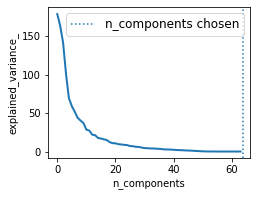

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

# Full example on face recognition:

2020-04-25 06:22:38,674 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012



Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
===============

2020-04-25 06:22:39,715 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2020-04-25 06:22:40,628 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2020-04-25 06:22:41,790 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.215s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.023s
Fitting the classifier to the training set
done in 45.079s
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.076s
                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.46      0.60        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.86      0.67      0.75        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00

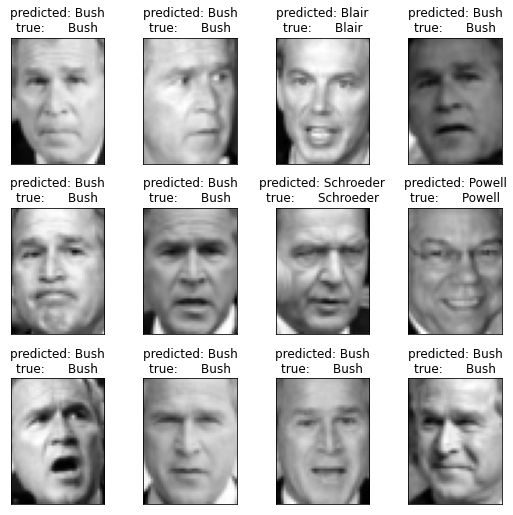

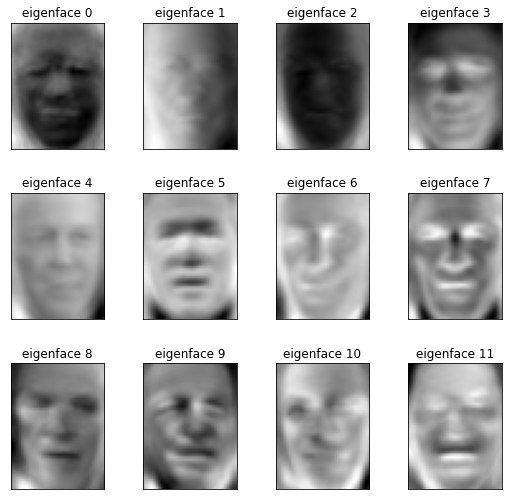

In [ ]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======

"""
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## sklearn FeatureUnion

https://www.kaggle.com/ahmadelsallab/gru-ridge-ridgecv-ftrl-lgb/edit

In [ ]:
'''
vectorizer = FeatureUnion([
    ('name', CountVectorizer(
        ngram_range=(1, 2),
        max_features=50000,
        preprocessor=build_preprocessor('name'))),
#     ('category_name', CountVectorizer(
#         token_pattern='.+',
#         preprocessor=build_preprocessor('category_name'))),
    ('subcat_0', CountVectorizer(
        token_pattern='.+',
        preprocessor=build_preprocessor('subcat_0'))),
    ('subcat_1', CountVectorizer(
        token_pattern='.+',
        preprocessor=build_preprocessor('subcat_1'))),
    ('subcat_2', CountVectorizer(
        token_pattern='.+',
        preprocessor=build_preprocessor('subcat_2'))),
    ('brand_name', CountVectorizer(
        token_pattern='.+',
        preprocessor=build_preprocessor('brand_name'))),
    ('shipping', CountVectorizer(
        token_pattern='\d+',
        preprocessor=build_preprocessor('shipping'))),
    ('item_condition_id', CountVectorizer(
        token_pattern='\d+',
        preprocessor=build_preprocessor('item_condition_id'))),
    ('desc_len', CountVectorizer(
        token_pattern='\d+',
        preprocessor=build_preprocessor('desc_len'))),
    ('name_len', CountVectorizer(
        token_pattern='\d+',
        preprocessor=build_preprocessor('name_len'))),
    ('item_description', TfidfVectorizer(
        ngram_range=(1, 3),
        max_features=100000,
        preprocessor=build_preprocessor('item_description'))),
])

X = vectorizer.fit_transform(full_df.values)
'''

"\nvectorizer = FeatureUnion([\n    ('name', CountVectorizer(\n        ngram_range=(1, 2),\n        max_features=50000,\n        preprocessor=build_preprocessor('name'))),\n#     ('category_name', CountVectorizer(\n#         token_pattern='.+',\n#         preprocessor=build_preprocessor('category_name'))),\n    ('subcat_0', CountVectorizer(\n        token_pattern='.+',\n        preprocessor=build_preprocessor('subcat_0'))),\n    ('subcat_1', CountVectorizer(\n        token_pattern='.+',\n        preprocessor=build_preprocessor('subcat_1'))),\n    ('subcat_2', CountVectorizer(\n        token_pattern='.+',\n        preprocessor=build_preprocessor('subcat_2'))),\n    ('brand_name', CountVectorizer(\n        token_pattern='.+',\n        preprocessor=build_preprocessor('brand_name'))),\n    ('shipping', CountVectorizer(\n        token_pattern='\\d+',\n        preprocessor=build_preprocessor('shipping'))),\n    ('item_condition_id', CountVectorizer(\n        token_pattern='\\d+',\n        pr

# References
http://scikit-learn.org/stable/tutorial/basic/tutorial.html